In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sn

In [2]:
data=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
data.shape

(11251, 15)

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


<Axes: >

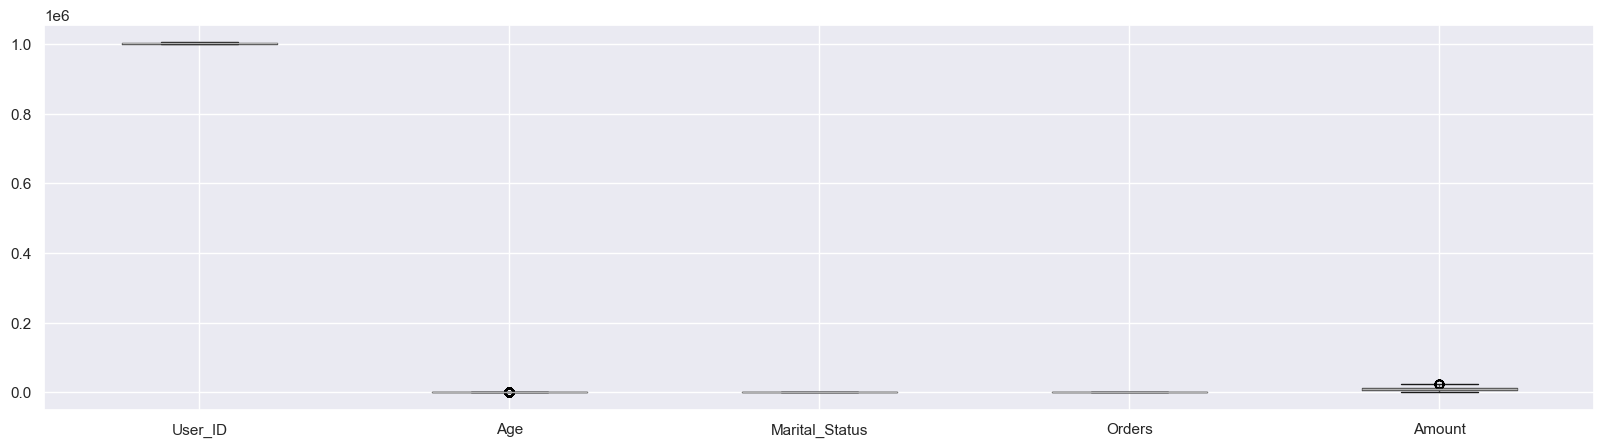

In [41]:
#ploting the boxplot
data.boxplot()

In [6]:
#droping the unrelated columns
data.drop(['Status', 'unnamed1'],axis=1,inplace=True)

In [8]:
#checking for the null values
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#here we can either drop the null values or can fill it with the mean values
data.dropna(inplace=True)

In [11]:
#now change the data type
data['Amount']=data['Amount'].astype('int')

In [12]:
data['Amount'].dtypes

dtype('int32')

In [13]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analsis

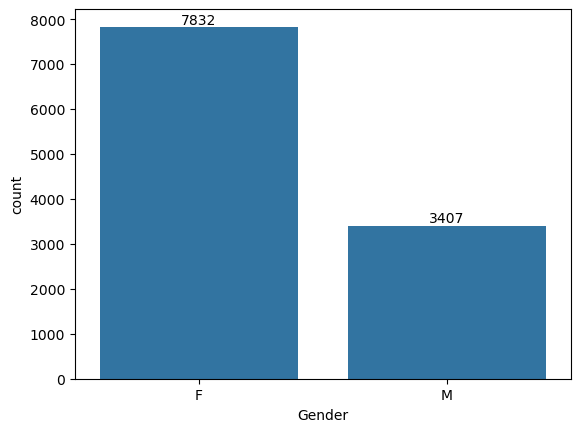

In [17]:
#ploting a bar chart for Gender and it'count
ax=sn.countplot(x='Gender',data=data)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

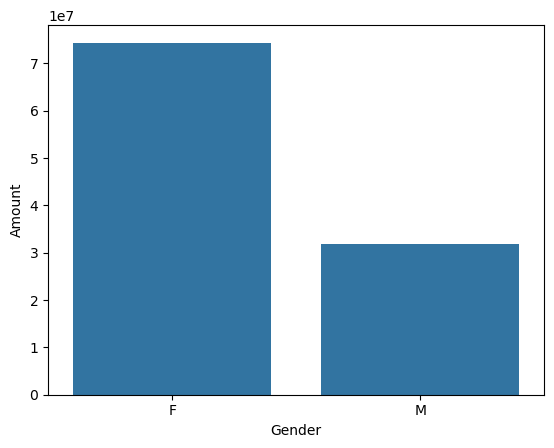

In [20]:
# Ploting a bar chart for gender vs total amount
sales_gen=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sn.barplot(x='Gender',y='Amount',data=sales_gen)

Analysis: From the above graph we come to know that most of the buyers are females and even their purchasing power are greater then man

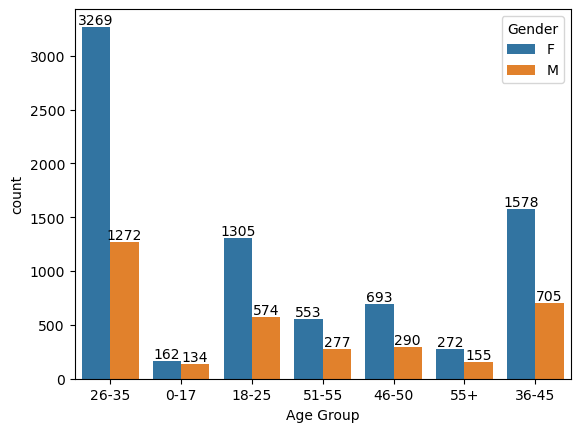

In [24]:
#now finding the age wise count of Genders

ax=sn.countplot(data=data,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
                

<Axes: xlabel='Age Group', ylabel='Amount'>

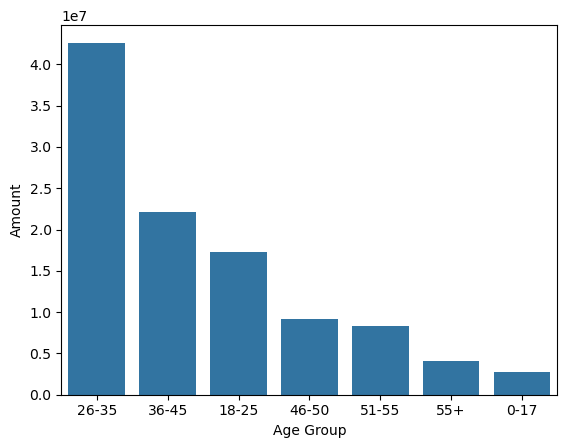

In [25]:
sales_gen=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sn.barplot(x='Age Group',y='Amount',data=sales_gen)

From above we can see that most of the buyers are of age group between 26-35 years.

<Axes: xlabel='State', ylabel='Amount'>

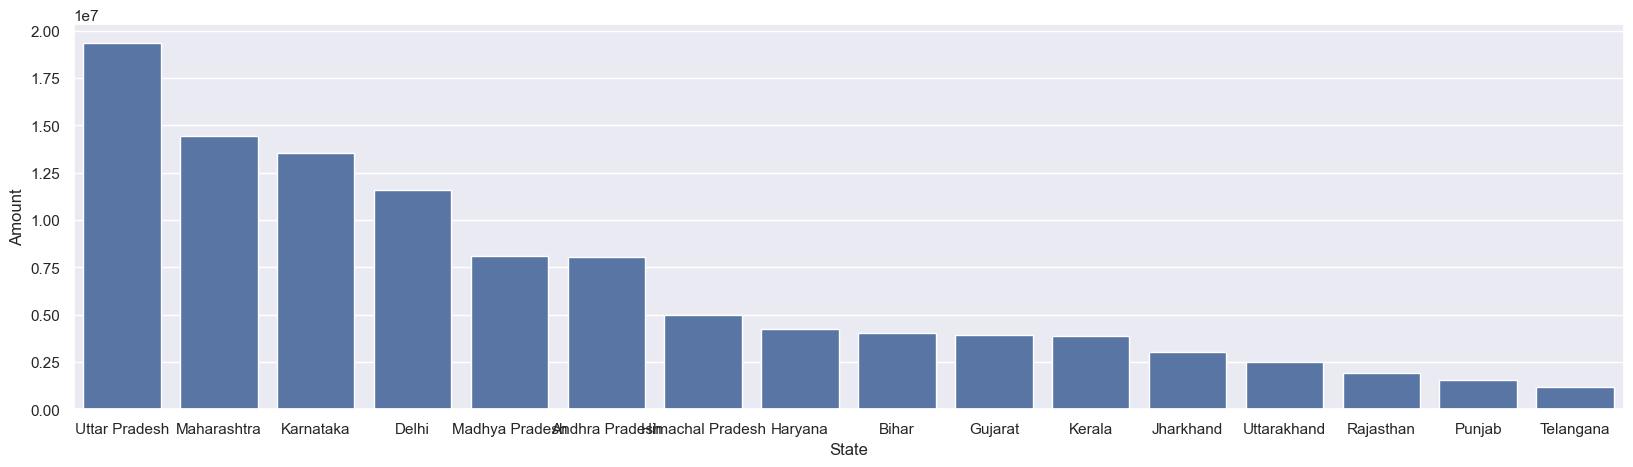

In [28]:
#total amount of sales from states
sales_state=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sn.set(rc={'figure.figsize':(20,5)})
sn.barplot(data=sales_state,x='State',y='Amount')


From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Martital Status

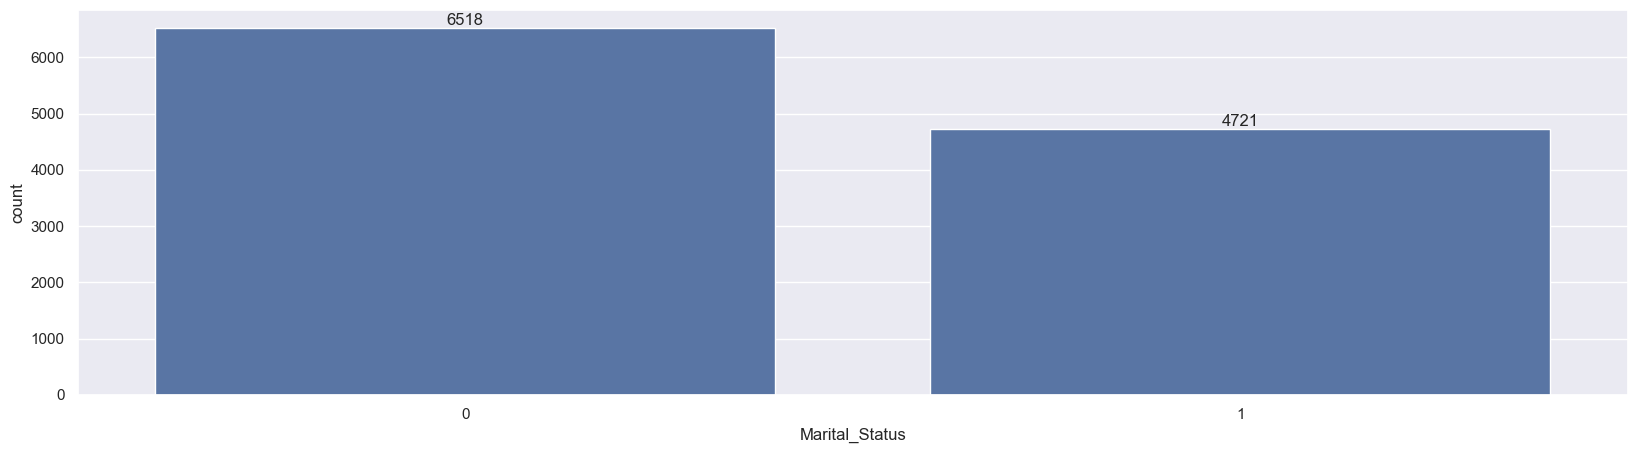

In [31]:
#now finding the age wise count of Genders

ax=sn.countplot(data=data,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
                

<Axes: xlabel='Marital_Status', ylabel='Amount'>

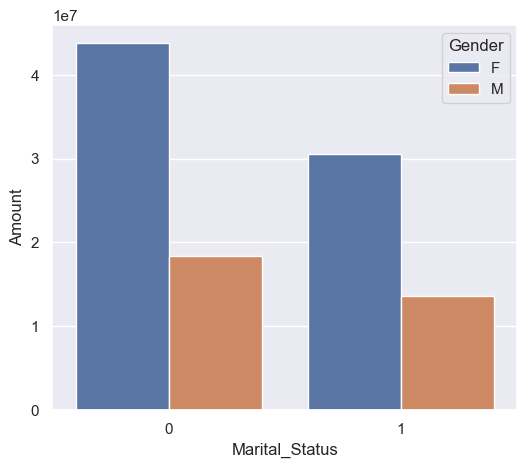

In [32]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sn.set(rc={'figure.figsize':(6,5)})
sn.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

Occupation

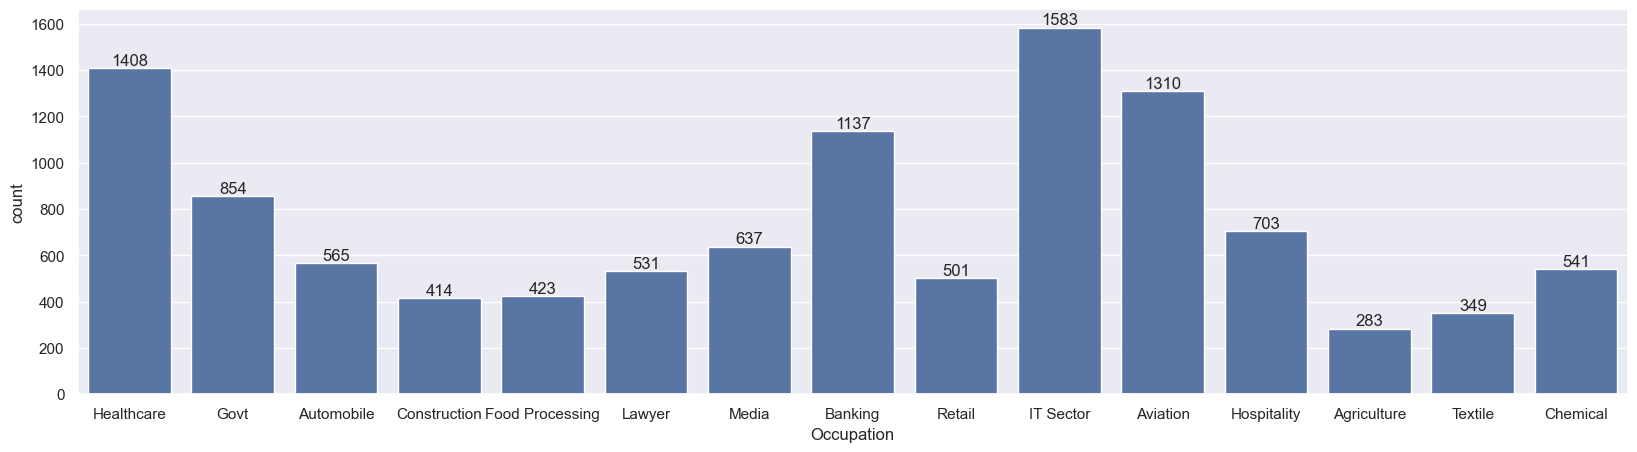

In [33]:
sn.set(rc={'figure.figsize':(20,5)})
ax=sn.countplot(data=data,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

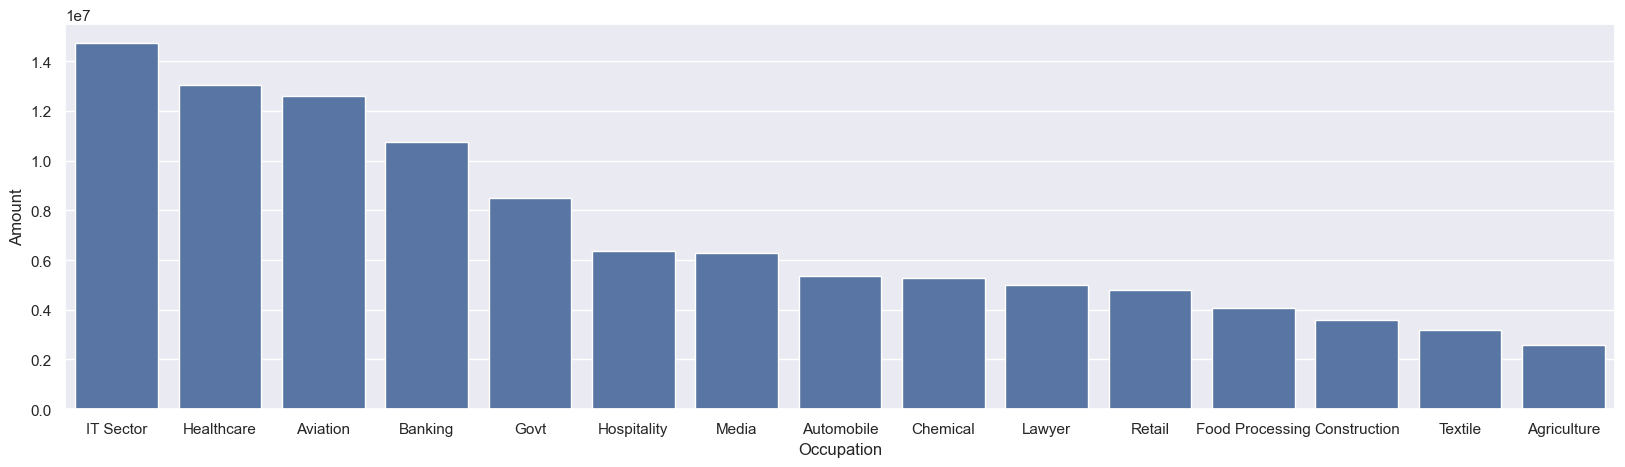

In [34]:
sales_state = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sn.set(rc={'figure.figsize':(20,5)})
sn.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

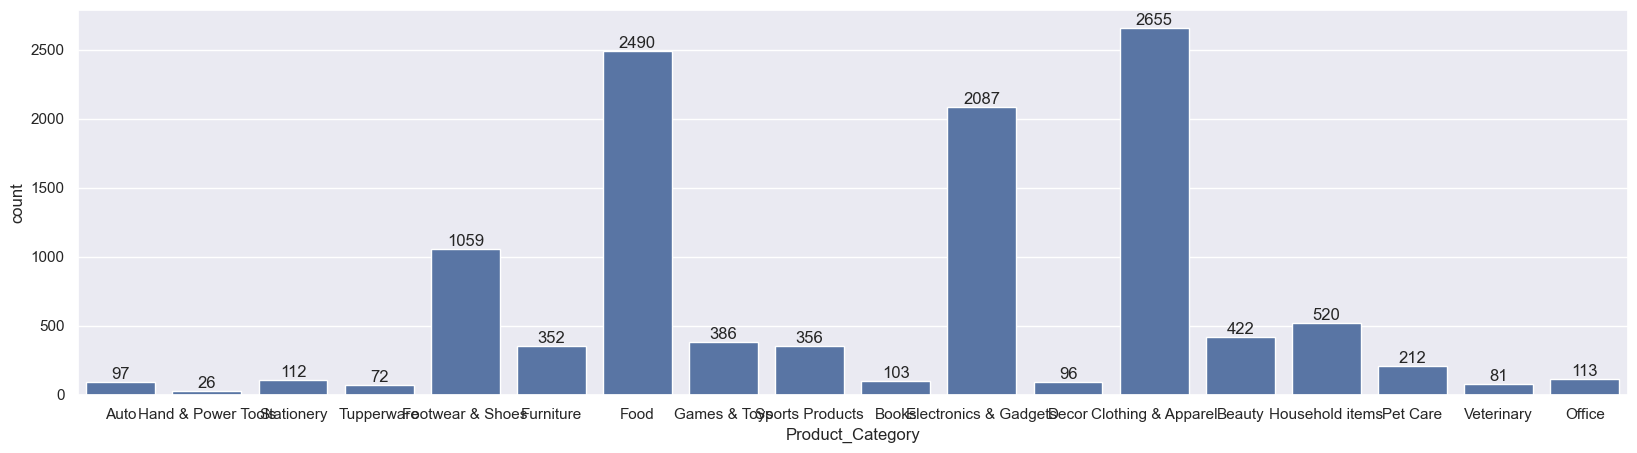

In [36]:
sn.set(rc={'figure.figsize':(20,5)})
ax=sn.countplot(data=data,x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

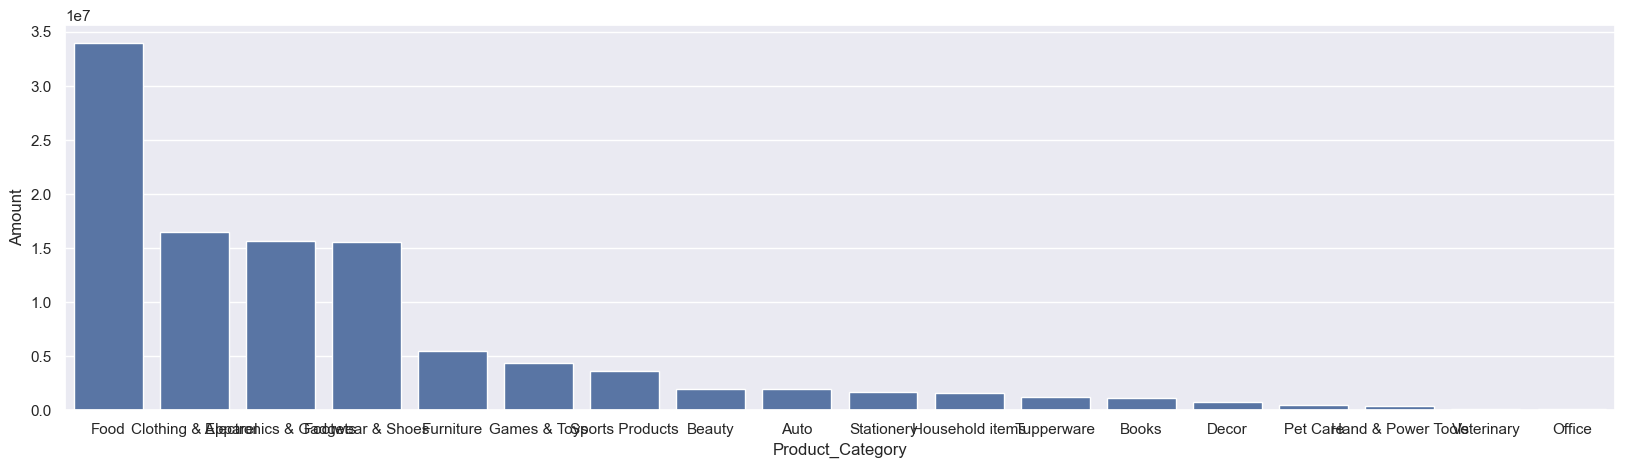

In [38]:
sales_cat=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sn.set(rc={'figure.figsize':(20,5)})
sn.barplot(data = sales_cat, x = 'Product_Category',y= 'Amount')


From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID'>

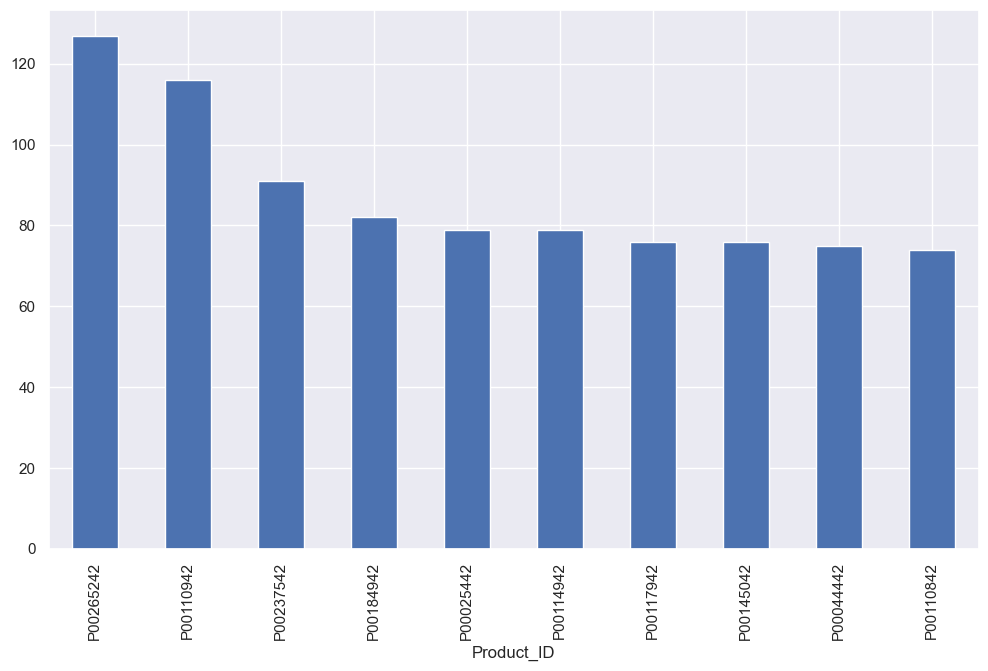

In [40]:
# top 10 most sold products (same thing as above)

fig1, ax1 = pt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category